<a href="https://colab.research.google.com/github/Amirahashem/Multi-Category-Scene-Recognition-CNN/blob/main/Multi_Category_Scene_Recognition_with_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
import os
import glob as gb
import cv2
import tensorflow as tf
import keras

from google.colab import drive
drive.mount('/content/drive/')

trainpath = '/content/drive/MyDrive/Datatt/seg_train'
testpath = '/content/drive/MyDrive/Datatt/seg_test'
predpath = '/content/drive/MyDrive/Datatt/seg_pred'

for folder in os.listdir(trainpath):
    folder_path = os.path.join(trainpath, folder)
    if os.path.isdir(folder_path):
        files = gb.glob(os.path.join(folder_path, '*.jpg'))
        print(f'For training data, found {len(files)} in folder {folder}')


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
For training data, found 2404 in folder glacier
For training data, found 2274 in folder sea
For training data, found 2191 in folder buildings
For training data, found 2271 in folder forest
For training data, found 2382 in folder street
For training data, found 2512 in folder mountain


In [ ]:
for folder in os.listdir(testpath):
    folder_path = os.path.join(testpath, folder)
    if os.path.isdir(folder_path):
        files = gb.glob(os.path.join(folder_path, '*.jpg'))
        print(f'For training data, found {len(files)} in folder {folder}')


For training data, found 510 in folder sea
For training data, found 525 in folder mountain
For training data, found 501 in folder street
For training data, found 553 in folder glacier
For training data, found 437 in folder buildings
For training data, found 474 in folder forest


In [ ]:
files = gb.glob(str(predpath) + '/*.jpg')
print(f'For Prediction data, found {len(files)}')

For Prediction data, found 7301


In [ ]:
code = {'buildings':0 ,'forest':1,'glacier':2,'mountain':3,'sea':4,'street':5}

def getcode(n) :
    for x , y in code.items() :
        if n == y :
            return x

In [ ]:
size = []
for folder in os.listdir(trainpath):
    folder_path = os.path.join(trainpath, folder)
    if os.path.isdir(folder_path):
        files = gb.glob(os.path.join(folder_path, '*.jpg'))
        for file in files:
            image = plt.imread(file)
            size.append(image.shape)
print(pd.Series(size).value_counts())

(150, 150, 3)    13986
(113, 150, 3)        7
(111, 150, 3)        3
(135, 150, 3)        3
(146, 150, 3)        2
(134, 150, 3)        2
(108, 150, 3)        2
(123, 150, 3)        2
(142, 150, 3)        2
(143, 150, 3)        2
(144, 150, 3)        2
(136, 150, 3)        2
(147, 150, 3)        1
(131, 150, 3)        1
(81, 150, 3)         1
(145, 150, 3)        1
(141, 150, 3)        1
(100, 150, 3)        1
(115, 150, 3)        1
(133, 150, 3)        1
(105, 150, 3)        1
(124, 150, 3)        1
(140, 150, 3)        1
(76, 150, 3)         1
(110, 150, 3)        1
(102, 150, 3)        1
(119, 150, 3)        1
(149, 150, 3)        1
(120, 150, 3)        1
(97, 150, 3)         1
(103, 150, 3)        1
dtype: int64


In [ ]:
size = []
files = gb.glob(pathname= str(predpath +'/*.jpg'))
for file in files:
    image = plt.imread(file)
    size.append(image.shape)
pd.Series(size).value_counts()

(150, 150, 3)    7288
(374, 500, 3)       1
(100, 150, 3)       1
(112, 150, 3)       1
(126, 150, 3)       1
(129, 150, 3)       1
(149, 150, 3)       1
(143, 150, 3)       1
(124, 150, 3)       1
(131, 150, 3)       1
(144, 150, 3)       1
(133, 150, 3)       1
(139, 150, 3)       1
(108, 150, 3)       1
dtype: int64

In [ ]:
s = 100

X_train = []
y_train = []

for folder in os.listdir(trainpath):
    folder_path = os.path.join(trainpath, folder)
    if os.path.isdir(folder_path):
        files = gb.glob(os.path.join(folder_path, '*.jpg'))
        for file in files:
          image = cv2.imread(file)
          image_array = cv2.resize(image , (s,s))
          X_train.append(list(image_array))
          y_train.append(code[folder])

In [ ]:
print(f'we have {len(X_train)} items in X_train')

we have 14034 items in X_train


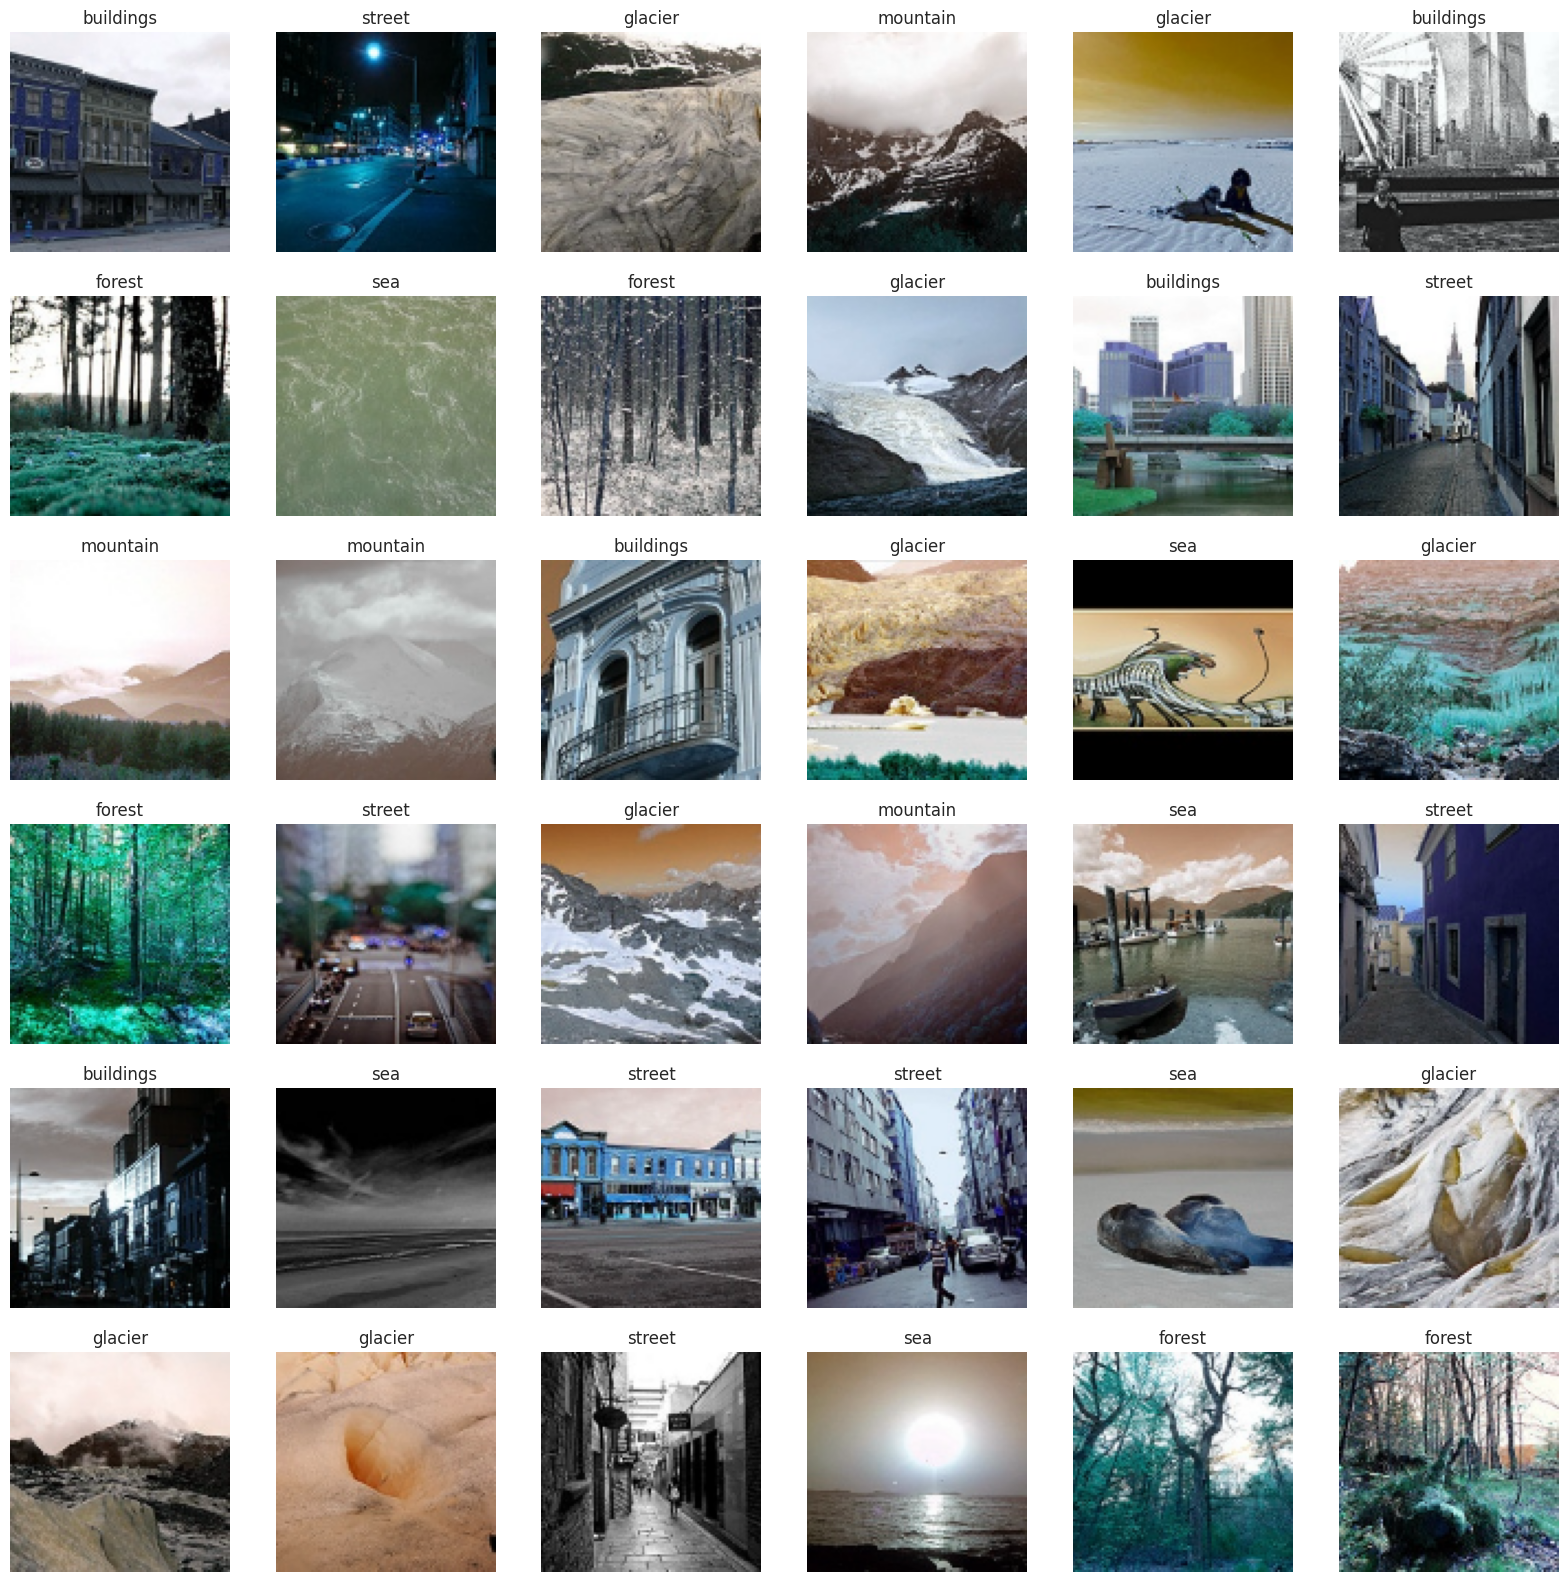

In [ ]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_train),36))) :
    plt.subplot(6,6,n+1)
    plt.imshow(X_train[i])
    plt.axis('off')
    plt.title(getcode(y_train[i]))

In [ ]:
X_test = []
y_test = []
for folder in os.listdir(testpath):
    folder_path = os.path.join(testpath, folder)
    if os.path.isdir(folder_path):
        files = gb.glob(os.path.join(folder_path, '*.jpg'))
    for file in files:
        image = cv2.imread(file)
        image_array = cv2.resize(image , (s,s))
        X_test.append(list(image_array))
        y_test.append(code[folder])

In [ ]:
print(f'we have {len(X_test)} items in X_test')

we have 3000 items in X_test


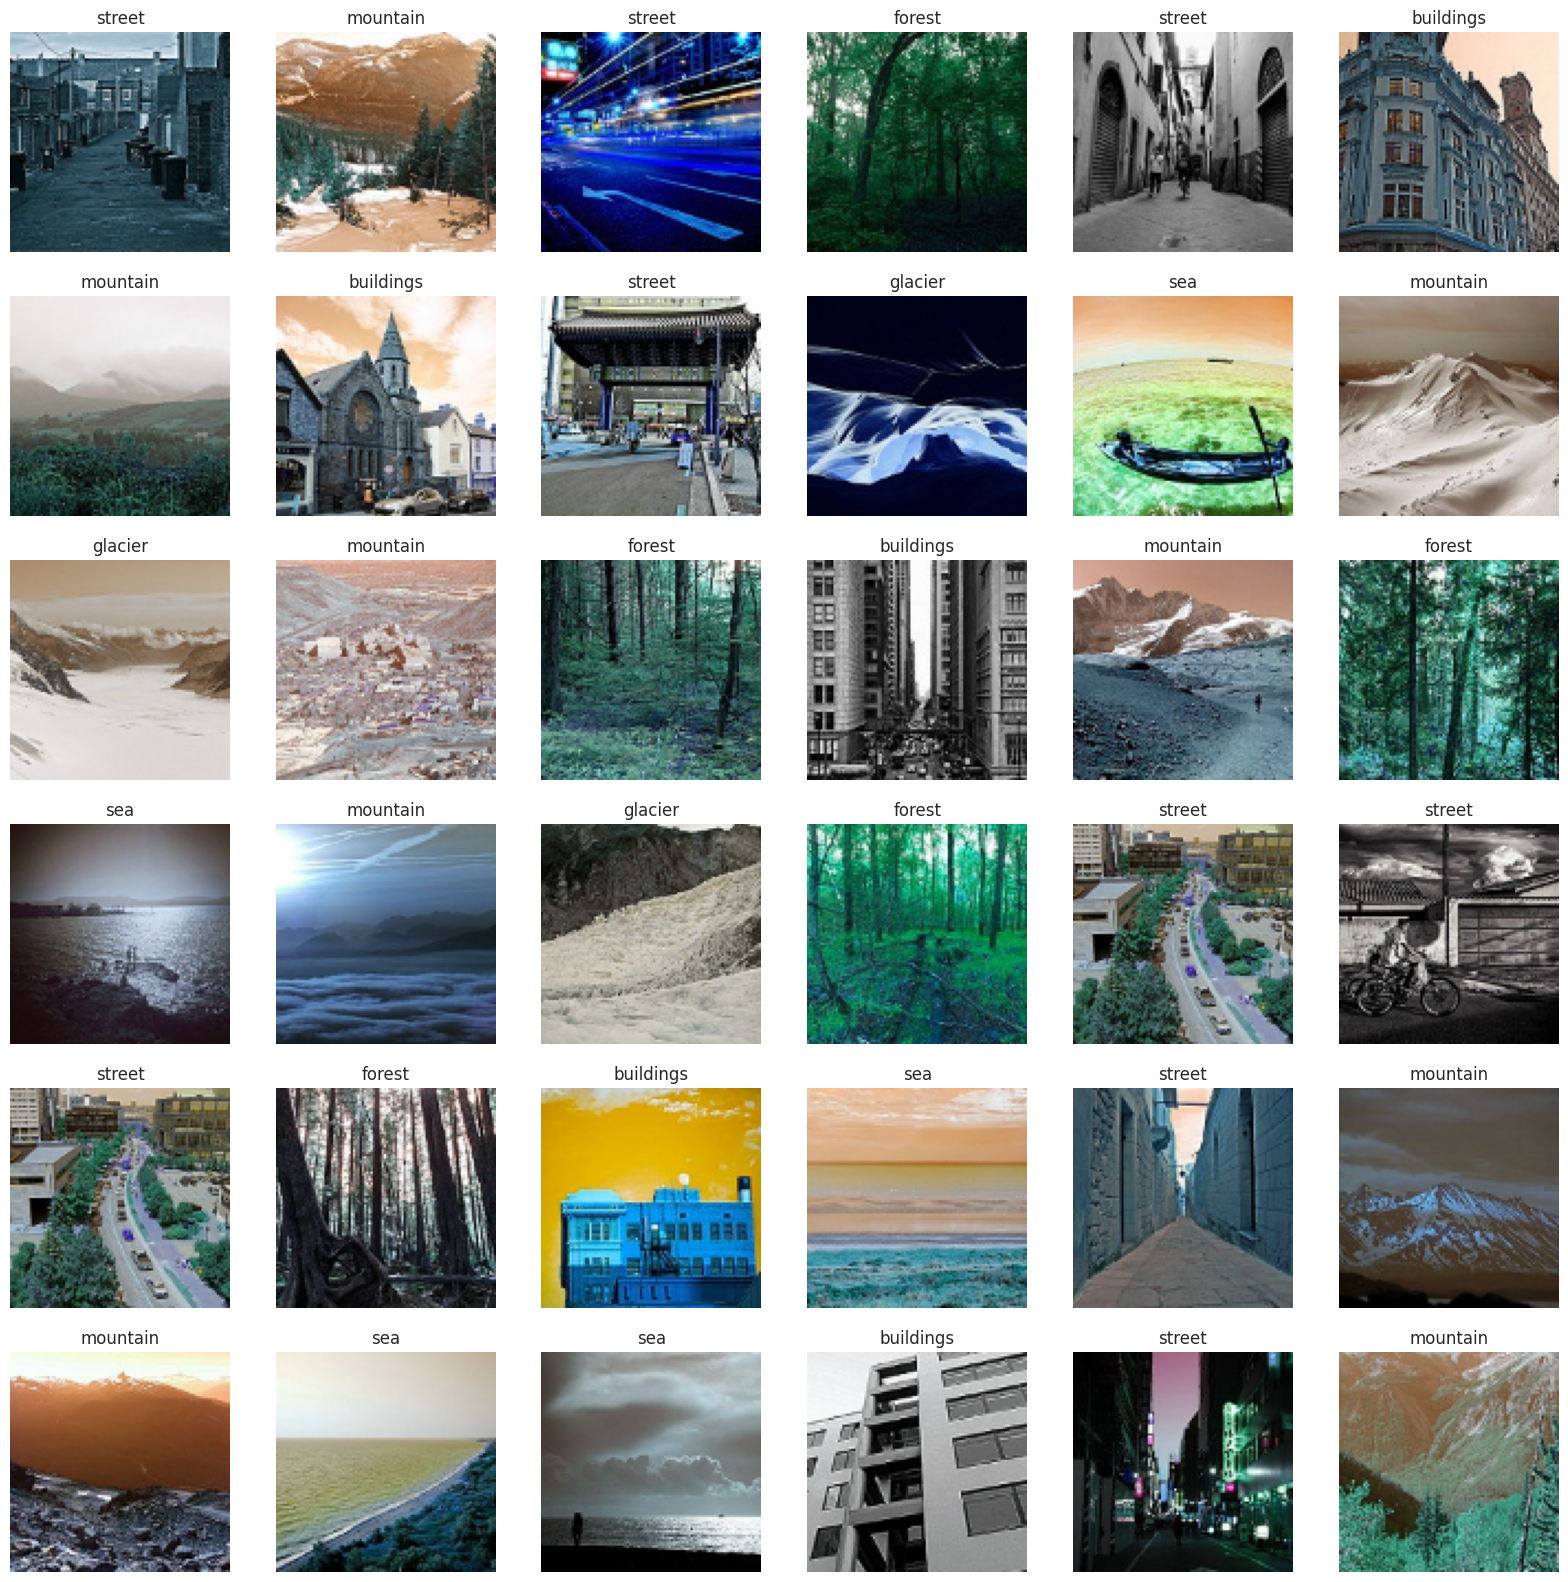

In [ ]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_test),36))) :
    plt.subplot(6,6,n+1)
    plt.imshow(X_test[i])
    plt.axis('off')
    plt.title(getcode(y_test[i]))

In [ ]:
X_pred = []
files = gb.glob(pathname= str(predpath + '/*.jpg'))
for file in files:
    image = cv2.imread(file)
    image_array = cv2.resize(image , (s,s))
    X_pred.append(list(image_array))

In [ ]:
X_train = np.array(X_train)
X_test = np.array(X_test)
X_pred_array = np.array(X_pred)
y_train = np.array(y_train)
y_test = np.array(y_test)

print(f'X_train shape  is {X_train.shape}')
print(f'X_test shape  is {X_test.shape}')
print(f'X_pred shape  is {X_pred_array.shape}')
print(f'y_train shape  is {y_train.shape}')
print(f'y_test shape  is {y_test.shape}')

X_train shape  is (14034, 100, 100, 3)
X_test shape  is (3000, 100, 100, 3)
X_pred shape  is (7301, 100, 100, 3)
y_train shape  is (14034,)
y_test shape  is (3000,)


In [ ]:
KerasModel = keras.models.Sequential([
        keras.layers.Conv2D(200,kernel_size=(3,3),activation='relu',input_shape=(s,s,3)),
        keras.layers.Conv2D(150,kernel_size=(3,3),activation='relu'),
        keras.layers.MaxPool2D(4,4),
        keras.layers.Conv2D(120,kernel_size=(3,3),activation='relu'),
        keras.layers.Conv2D(80,kernel_size=(3,3),activation='relu'),
        keras.layers.Conv2D(50,kernel_size=(3,3),activation='relu'),
        keras.layers.MaxPool2D(4,4),
        keras.layers.Flatten() ,
        keras.layers.Dense(120,activation='relu') ,
        keras.layers.Dense(100,activation='relu') ,
        keras.layers.Dense(50,activation='relu') ,
        keras.layers.Dropout(rate=0.5) ,
        keras.layers.Dense(6,activation='softmax') ,
        ])

In [ ]:
KerasModel.compile(optimizer ='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
epochs = 50
ThisModel = KerasModel.fit(X_train, y_train, epochs=epochs,batch_size=64,verbose=1)

Epoch 1/50
220/220 [==============================] - 5383s 24s/step - loss: 1.6205 - accuracy: 0.4089
Epoch 2/50
214/220 [============================>.] - ETA: 2:31 - loss: 1.1105 - accuracy: 0.5667

In [ ]:
ModelLoss, ModelAccuracy = KerasModel.evaluate(X_test, y_test)

print('Test Loss is {}'.format(ModelLoss))
print('Test Accuracy is {}'.format(ModelAccuracy ))

In [ ]:
y_pred = KerasModel.predict(X_test)

print('Prediction Shape is {}'.format(y_pred.shape))

In [ ]:
y_result = KerasModel.predict(X_pred_array)

print('Prediction Shape is {}'.foormat(y_result.shape))

In [ ]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_pred),36))) :
    plt.subplot(6,6,n+1)
    plt.imshow(X_pred[i])
    plt.axis('off')
    plt.title(getcode(np.argmax(y_result[i])))